# Machine learning

<br><br><br>

## Solutions to the first project (do not peek!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
penguins = pd.read_csv("data/penguins.csv")
penguins[["flipper_length_mm", "body_mass_g"]]
measurements = penguins[["flipper_length_mm", "body_mass_g"]].dropna().values

In [3]:
def body_mass(flipper_length, a, b):
    return a * flipper_length + b

In [4]:
def badness_of_fit(a, b, measurements):
    badness = 0

    for measured_length, measured_mass in measurements:
        badness += (body_mass(measured_length, a, b) - measured_mass)**2
    
    return badness

In [9]:
def better_fit(i, a, b, measurements):
    lowest_badness = badness_of_fit(a, b, measurements)
    
    if i % 2 == 0:
        for new_a in [a + 10, a + 1, a + 0.1, a - 0.1, a - 1, a - 10]:
            trial = badness_of_fit(new_a, b, measurements)
            if trial < lowest_badness:
                lowest_badness = trial
                a = new_a

    else:
        for new_b in [b + 1000, b + 100, b + 10, b - 10, b - 100, b - 1000]:
            trial = badness_of_fit(a, new_b, measurements)
            if trial < lowest_badness:
                lowest_badness = trial
                b = new_b

    return a, b

In [10]:
i = 0   # iteration number
a = 30
b = -3000

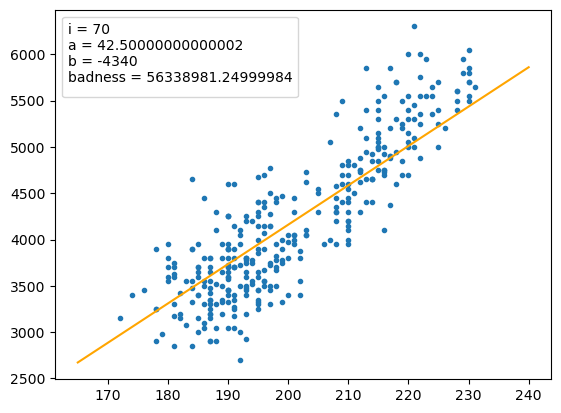

In [81]:
# a, b = better_fit(i, a, b, measurements)
# i += 1

fig, ax = plt.subplots()

ax.scatter(measurements[:, 0], measurements[:, 1], marker=".")

x = np.linspace(165, 240, 10)
y = body_mass(x, a, b)
ax.plot(x, y, color="orange")

badness = badness_of_fit(a, b, measurements)

ax.legend([], [], title=f"i = {i}\na = {a}\nb = {b}\nbadness = {badness}", loc="upper left")

None

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## Scikit-Learn

<img src="img/sklearn-logo.svg" width="300">

In [82]:
import sklearn.linear_model

In [83]:
linear = sklearn.linear_model.LinearRegression()

In [84]:
linear.fit(measurements[:, np.newaxis, 0], measurements[:, np.newaxis, 1])

LinearRegression()

In [85]:
a = linear.coef_[0, 0]
b = linear.intercept_[0]

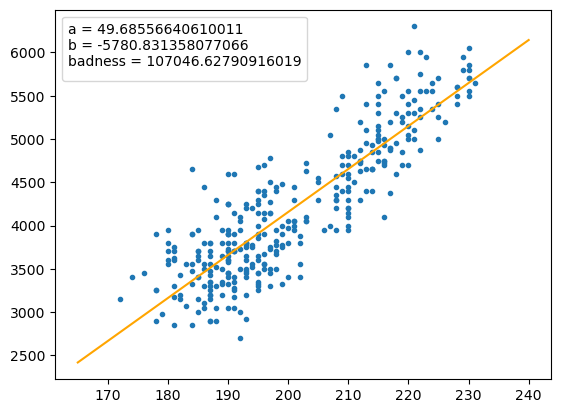

In [87]:
fig, ax = plt.subplots()

ax.scatter(measurements[:, 0], measurements[:, 1], marker=".")

x = np.linspace(165, 240, 10)
y = linear.predict(x[:, np.newaxis])
ax.plot(x, y, color="orange")

badness = 0
for measured_length, measured_mass in measurements:
    badness += abs(linear.predict([[measured_length]])[0, 0] - measured_mass)

ax.legend([], [], title=f"a = {a}\nb = {b}\nbadness = {badness}", loc="upper left")

None

<br><br><br>

But we didn't do a _standard_ linear fit, in which badness is measured as `(prediction - measurement)**2`, we did a an alternate fit, optimizing `abs(prediction - measurement)`.

Fortunately, this is also in Scikit-Learn. Scikit-Learn has _all_ the models!

<br><br><br>

What does the "badness versus `a` and `b`" function look like near the minimum?

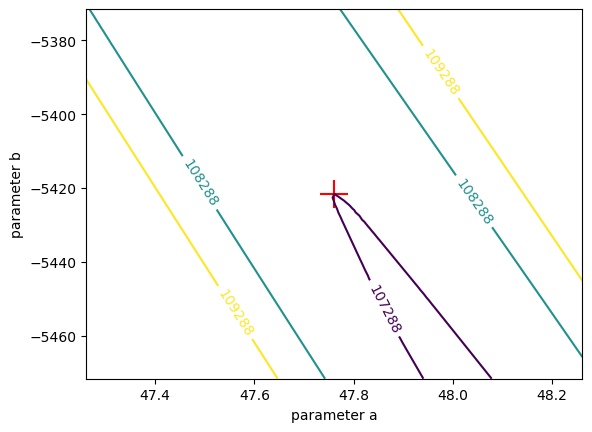

In [559]:
fig, ax = plt.subplots()

a_grid, b_grid = np.meshgrid(np.linspace(a - 0.5, a + 0.5, 101), np.linspace(b - 50, b + 50, 101))
contour = ax.contour(a_grid, b_grid, badness_of_fit(a_grid, b_grid, measurements), levels=[badness, badness + 1000, badness + 2000])
ax.clabel(contour)

ax.scatter([a], [b], marker="+", s=400, color="red")

ax.set_xlabel("parameter a")
ax.set_ylabel("parameter b")

None

It's a long, flat valley in a direction that's diagonal in `a` and `b`.

It's a hard minimum to find if we only take steps in the `a` direction or the `b` direction!